# Analyzing Video with OpenCV and NumPy

## Task 1: Import libraries

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 

VFILE = "video/hot_rod.mp4"

## Task 1: Define generator for reading video

In [2]:
def get_frames(filename):
    video = cv2.VideoCapture(filename)
    while video.isOpened():
        ret, frame = video.read()
        if ret:
            yield frame
        else:
            break
    video.release()
    yield None

## Task 2: Retrieve and display video frames

In [3]:
for f in get_frame(VFILE):
    if f is None:
        break
    
    cv2.imshow("Frame", f)
    if cv2.waitKey(10) == 27:
        break
    
cv2.destroyAllWindows()

NameError: name 'get_frame' is not defined

## Task 2: Define function to get a single video frame

In [ ]:
def get_frame(filename, index):
    counter = 0
    
    video = cv2.VideoCapture(filename)
    while video.isOpened():
        ret, frame = video.read()
        if ret:
            if counter == index:
                return frame
            counter += 1
        else:
            break
    video.release()
    return None

## Task 2: Examining pixels

In [ ]:
frame = get_frame(VFILE, 80)

print("Shape", frame.shape)
print("Pixel at (0, 0)", frame[0, 0, :])
print("Pixel at (150, 75)", frame[150, 75, :])

## Task 2: Displaying a video frame

In [ ]:
plt.imshow(frame)

## Task 3: Fixing color convention

In [ ]:
fix_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
print("Pixel at (0, 0) ", fix_frame[0, 0, :])
plt.imshow(fix_frame)

## Task 3: Cropping a video frame

In [ ]:
plt.imshow(fix_frame[240:480, 320:640])

## Task 3: Adjusting Brightness

In [ ]:
darker = 0.5 * fix_frame
darker = darker.astype(np.uint8)
plt.imshow(darker)

## Task 4: Drawing a circle

In [ ]:
frame = get_frame(VFILE, 200)
cv2.circle(frame,
           center=(200, 200),
           radius=50,
           color=(0,0,255),
           thickness=10)

fixed_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(fixed_frame)

## Task 4: Processing an entire video

In [4]:
counter = 0

for frame in get_frames(VFILE):
    if frame is None:
        break
        
    cv2.putText(frame,
               text=str(counter),
               org=(100, 100),
               fontFace=cv2.FONT_HERSHEY_SIMPLEX,
               fontScale=1,
               color=(0,255,0),
               thickness=3)
    cv2.imshow("Frame", frame)
    
    if cv2.waitKey(10) == 27:
        break 
    counter += 1
cv2.destroyAllWindows() 

## Task 5: Generating a new video file

In [7]:
fourcc = cv2.VideoWriter_fourcc('M', 'P', '4', 'V')
video_out = cv2.VideoWriter("new.mp4", fourcc, 20, (640, 480))

counter = 0

for frame in get_frames(VFILE):
    if frame is None:
        break
        
    cv2.putText(frame,
               text=str(counter),
               org=(100, 100),
               fontFace=cv2.FONT_HERSHEY_SIMPLEX,
               fontScale=1,
               color=(0,255,0),
               thickness=3)
    video_out.write(frame)
    counter += 1
video_out.release()

## Task 5: Finding the total frame count

In [9]:
video = cv2.VideoCapture(VFILE)
count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
video.release()
print("Frame Count :", count)

Frame Count : 3597


## Task 6: Creating a collage

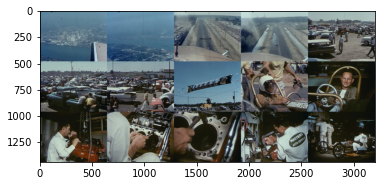

In [11]:
skip_frames = count // 15

frames = []
counter = 0

for f in get_frames(VFILE):
    if counter % skip_frames == 0:
        frames.append(f)
    counter += 1
    
row1 = np.concatenate(frames[0:5], axis=1)
row2 = np.concatenate(frames[5:10], axis=1)
row3 = np.concatenate(frames[10:15], axis=1)

collage = np.concatenate((row1, row2, row3), axis=0)

collage = cv2.cvtColor(collage, cv2.COLOR_BGR2RGB)
plt.imshow(collage)